<a href="https://colab.research.google.com/github/miguellanos76/2048-python-para-data-science-trabajar-con-funciones/blob/main/AluraStoreLatamEric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [1]:
!pip install  matplotlib

In [3]:
import matplotlib.pyplot as plt

In [4]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

In [5]:
datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
print(datos.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


In [6]:
ingresos = datos.groupby("Tienda")["Precio"].sum().round().sort_values()
print(ingresos.astype(int))

Tienda
Tienda 4    1038375700
Tienda 3    1098019600
Tienda 2    1116343500
Tienda 1    1150880400
Name: Precio, dtype: int64


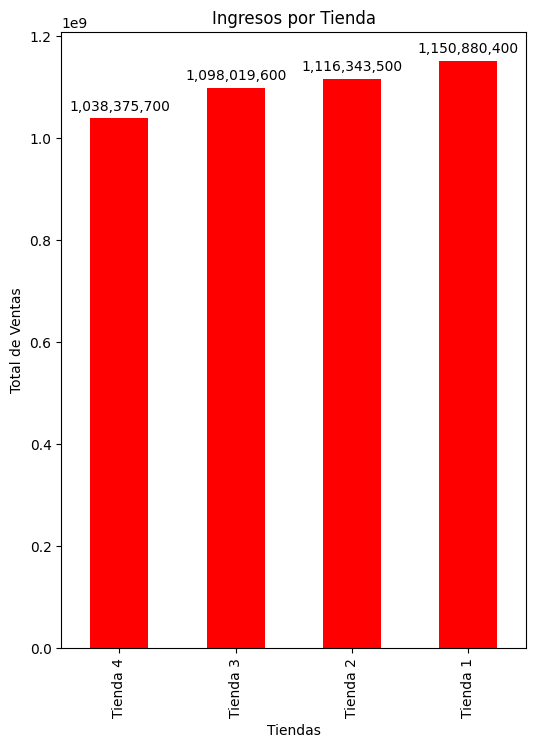

In [7]:
plt.figure(figsize=(6,8))
ax = ingresos.plot(kind="bar", title="Ingresos por Tienda", ylabel="Total de Ventas", color="red")
ax.set_xlabel("Tiendas")
for p in ax.patches: # ax.patches es la lista de todas las barras
    ax.annotate(f"{int(p.get_height()):,}", # Formatea el número
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

# 2. Ventas por categoría

In [8]:
ventas_categoria = datos.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad")

In [9]:
populares_por_tienda = ventas_categoria.sort_values(["Tienda", "Cantidad"], ascending=[True, False])
populares_por_tienda = populares_por_tienda.groupby("Tienda").head(3)
print(populares_por_tienda)

      Tienda Categoría del Producto  Cantidad
7   Tienda 1                Muebles       465
3   Tienda 1           Electrónicos       448
5   Tienda 1               Juguetes       324
15  Tienda 2                Muebles       442
11  Tienda 2           Electrónicos       422
13  Tienda 2               Juguetes       313
23  Tienda 3                Muebles       499
19  Tienda 3           Electrónicos       451
21  Tienda 3               Juguetes       315
31  Tienda 4                Muebles       480
27  Tienda 4           Electrónicos       451
29  Tienda 4               Juguetes       338


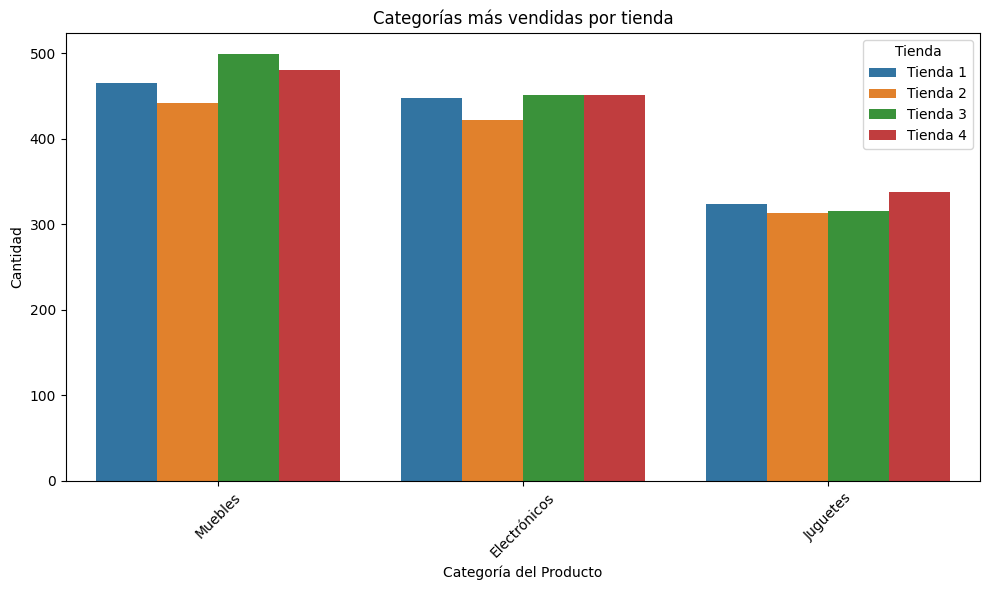

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=populares_por_tienda, x="Categoría del Producto", y="Cantidad", hue="Tienda")
plt.title("Categorías más vendidas por tienda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [11]:
print(datos["Calificación"].value_counts())

Calificación
5    5250
4    1813
1    1199
3     830
2     343
Name: count, dtype: int64


In [12]:
calificaciones_promedio = datos.groupby("Tienda")["Calificación"].mean().reset_index()

calificaciones_promedio["Calificación"] = calificaciones_promedio["Calificación"].round(2)

print(calificaciones_promedio)

     Tienda  Calificación
0  Tienda 1          3.98
1  Tienda 2          4.04
2  Tienda 3          4.05
3  Tienda 4          4.00


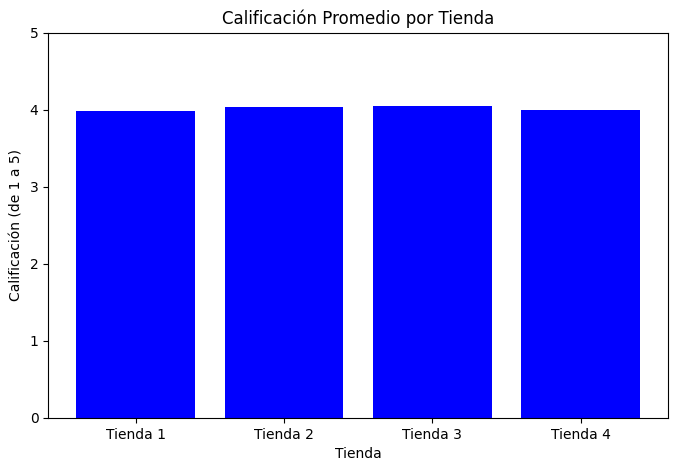

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(calificaciones_promedio["Tienda"], calificaciones_promedio["Calificación"], color="blue")
plt.ylim(0, 5)
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación (de 1 a 5)")
plt.xlabel("Tienda")
plt.show()

# 4. Productos más y menos vendidos

In [14]:
ventas_por_producto = datos.groupby(["Tienda", "Producto"]).size().reset_index(name="Ventas")
ventas_por_producto = ventas_por_producto.sort_values(["Tienda", "Ventas"], ascending=[True, False])
ventas_por_producto = ventas_por_producto.groupby("Tienda").head(3)
print(ventas_por_producto.head())

      Tienda                   Producto  Ventas
1   Tienda 1                    Armario      60
33  Tienda 1                 Microondas      60
48  Tienda 1              TV LED UHD 4K      60
75  Tienda 2  Iniciando en programación      65
84  Tienda 2                 Microondas      62


In [15]:
productos_mas_vendidos = ventas_por_producto.loc[ventas_por_producto.groupby("Tienda")["Ventas"].idxmax()]

productos_menos_vendidos = ventas_por_producto.loc[ventas_por_producto.groupby("Tienda")["Ventas"].idxmin()]

print("Productos mas vendidos:")
print(productos_mas_vendidos)

print("\nProductos menos vendidos:")
print(productos_menos_vendidos)

Productos mas vendidos:
       Tienda                   Producto  Ventas
1    Tienda 1                    Armario      60
75   Tienda 2  Iniciando en programación      65
129  Tienda 3              Kit de bancas      57
163  Tienda 4                   Cama box      62

Productos menos vendidos:
       Tienda   Producto  Ventas
1    Tienda 1    Armario      60
58   Tienda 2    Batería      61
113  Tienda 3  Cama king      56
164  Tienda 4  Cama king      56


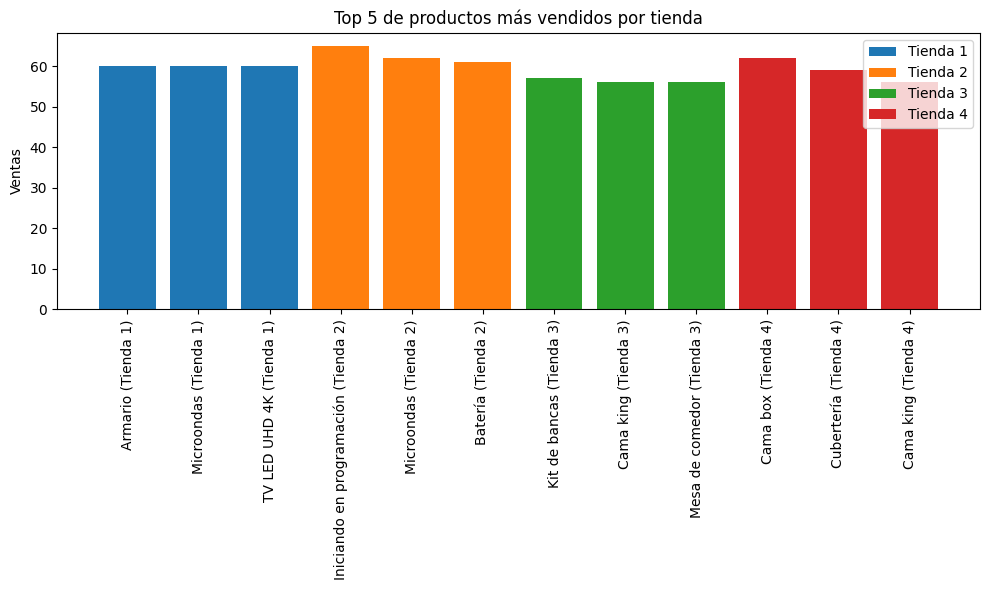

In [16]:
plt.figure(figsize=(10,6))
for tienda in datos["Tienda"].unique():
    top = ventas_por_producto[ventas_por_producto["Tienda"] == tienda].sort_values("Ventas", ascending=False).head(5)
    plt.bar(top["Producto"] + " (" + tienda + ")", top["Ventas"], label=tienda)

plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.title("Top 5 de productos más vendidos por tienda")
plt.legend()
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [17]:
envio_promedio = datos.groupby("Tienda")["Costo de envío"].mean().reset_index()

envio_promedio["Costo de envío"] = envio_promedio["Costo de envío"].round(2)

print(envio_promedio)

     Tienda  Costo de envío
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46


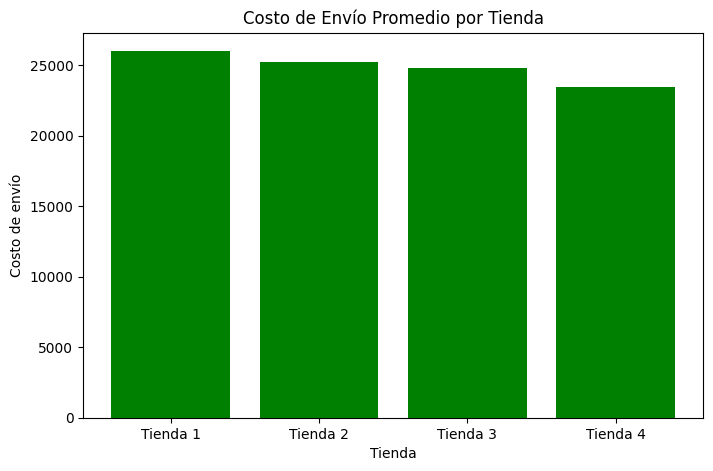

In [20]:
plt.figure(figsize=(8,5))
plt.bar(envio_promedio["Tienda"], envio_promedio["Costo de envío"], color="green")
plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo de envío")
plt.xlabel("Tienda")
plt.show()

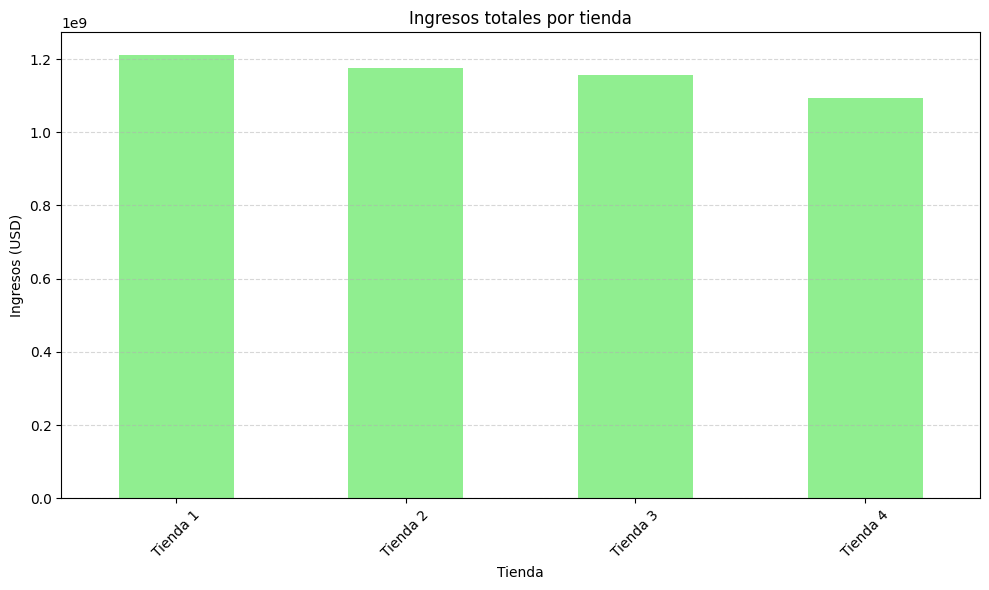

In [21]:

import matplotlib.pyplot as plt

datos["Ingresos"] = datos["Precio"] + datos["Costo de envío"]

ingresos_por_tienda = datos.groupby("Tienda")["Ingresos"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ingresos_por_tienda.plot(kind="bar", color="lightgreen")
plt.title("Ingresos totales por tienda")
plt.ylabel("Ingresos (USD)")
plt.xlabel("Tienda")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


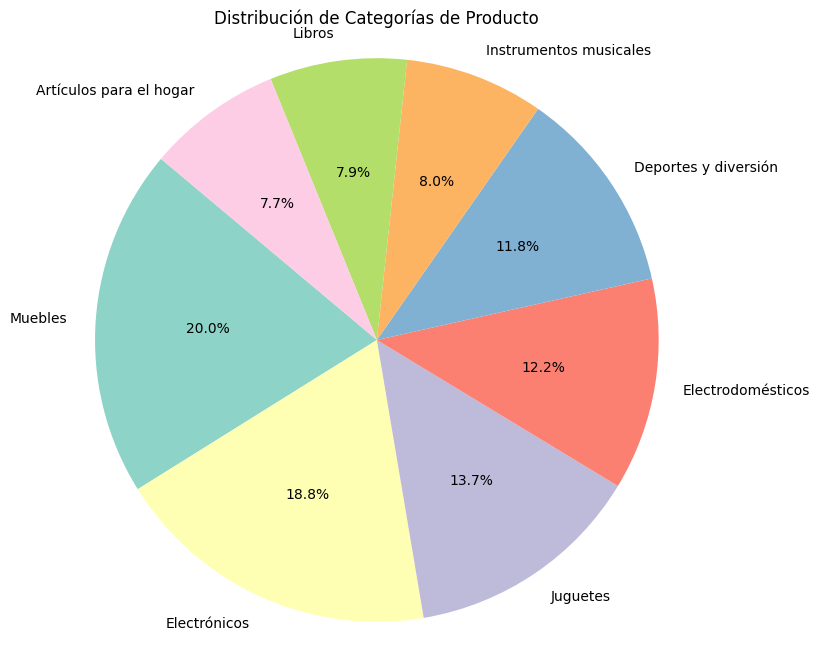

In [22]:
categorias = datos["Categoría del Producto"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(categorias, labels=categorias.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Set3.colors)
plt.title("Distribución de Categorías de Producto")
plt.axis("equal")
plt.show()

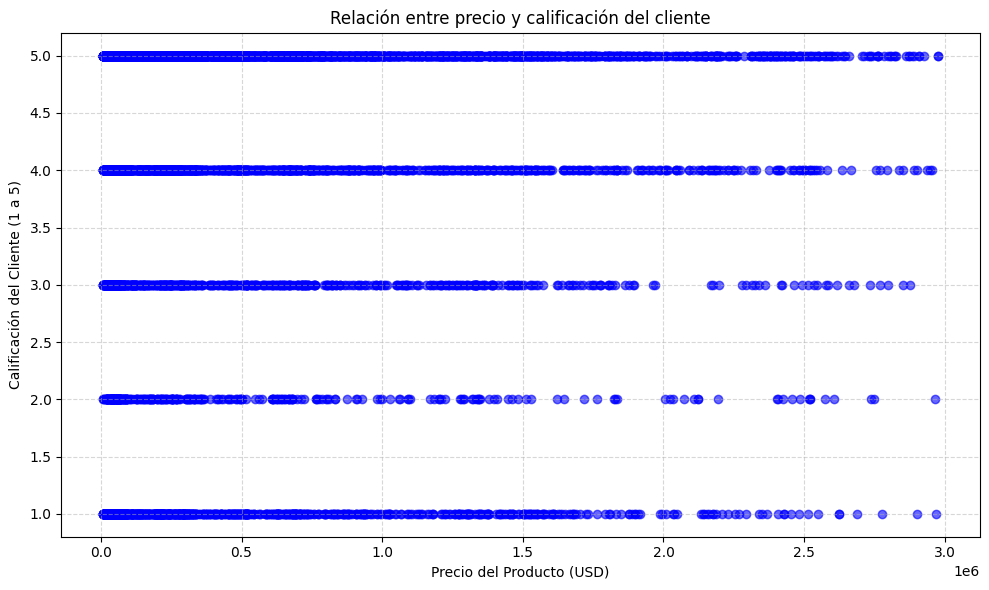

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(datos["Precio"], datos["Calificación"], alpha=0.6, color="blue")
plt.title("Relación entre precio y calificación del cliente")
plt.xlabel("Precio del Producto (USD)")
plt.ylabel("Calificación del Cliente (1 a 5)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

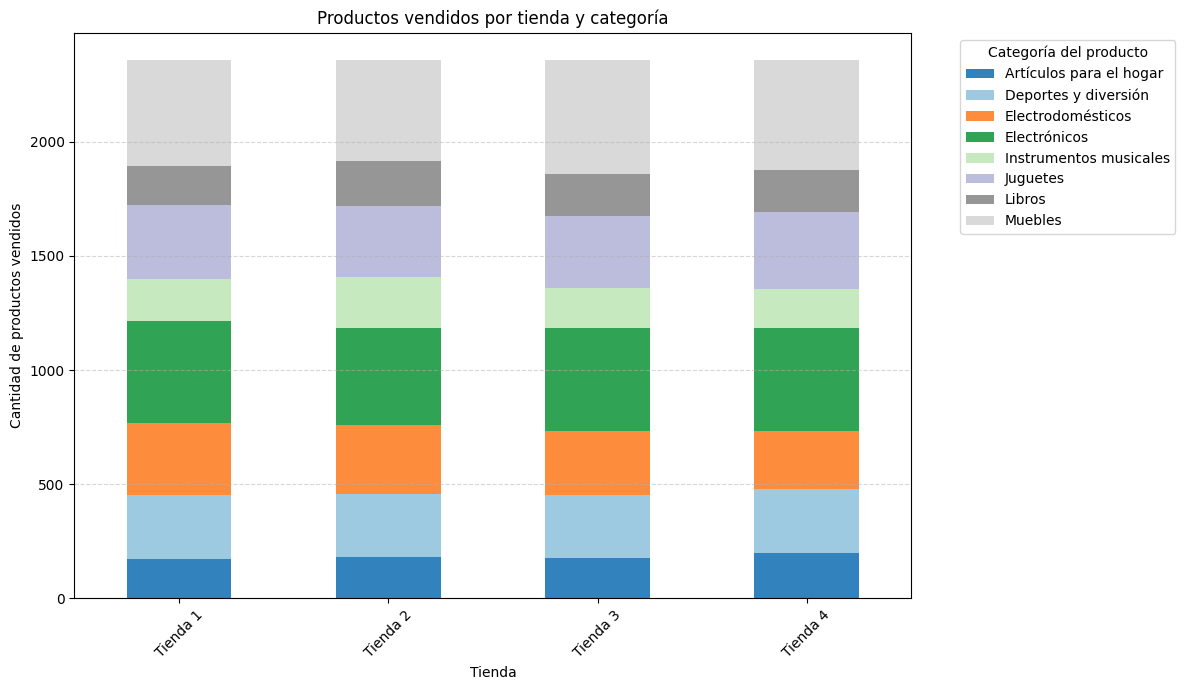

In [24]:
ventas = datos.groupby(["Tienda", "Categoría del Producto"])["Producto"].count().unstack(fill_value=0)

ventas.plot(kind="bar", stacked=True, figsize=(12, 7), colormap="tab20c")
plt.title("Productos vendidos por tienda y categoría")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de productos vendidos")
plt.xticks(rotation=45)
plt.legend(title="Categoría del producto", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

Informe Final

1. Facturacion total de cada tienda:

Tienda 1: 1,150,880,400

Tienda 2: 1,116,343,500

Tienda 3: 1,098,019,600

Tienda 4: 1,038,375,700

 2.  Categorías mas populares:

Categorías más vendidas: Muebles, Electrónicos, y Juguetes en todas las tiendas.

Tienda 3: Lidera en ventas de Muebles (499 unidades) y Electrónicos (451 unidades).

Tienda 2: Destaca con 442 ventas de Muebles y 422 de Electrónicos.

3. Promedio de calificación de los Clientes:

Tienda 3: 4.05 (más alta)

Tienda 2: 4.04

Tienda 4: 4.00

Tienda 1: 3.98 (más baja)


4. Productos más y menos vendidos:

Tienda 1: Armario (60 unidades), Microondas, TV LED UHD 4K (60 unidades cada uno)

Tienda 2: Iniciando en programación (65 unidades) y bateria (61 unidades)

Tienda 3: Kit de bancas (57 unidades) y Cama king (56 unidades)

Tienda 4: Cama box (62 unidades) y Cama king (56 unidades)

5. Costo promedio del envío:

Tienda 4: 23,459.46 (más bajo)

Tienda 3: 24,805.68

Tienda 2: 25,216.24

Tienda 1: 26,018.61 (más alto)

**Recomendación**: Vender Tienda 4

Bajos Ingresos: la "Tienda 4" tiene los ingresos más bajos.

Costo de Envío: Aunque tiene el costo de envío más bajo, este factor no ha sido suficiente para aumentar las ventas de la "Tienda 4".

Potencial de Crecimiento Limitado: A pesar de su bajo costo de envío, la "Tienda 4" muestra un rendimiento limitado y no tiene el mismo potencial de crecimiento que otras tiendas.